# Метод ближайших соседей

In [2]:
from sklearn.datasets import make_moons, make_blobs, make_circles
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from matplotlib.colors import ListedColormap
import numpy as np

%matplotlib inline

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
def plot_separating_surface(X, y, cls, title=''):
    x_min = np.min(X[:, 0]) - 0.1
    x_max = np.max(X[:, 0]) + 0.1
    y_min = np.min(X[:, 1]) - 0.1
    y_max = np.max(X[:, 1]) + 0.1
    h = min(x_max - x_min, y_max - y_min) / 1000
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                             np.arange(y_min, y_max, h))
    Z = cls.predict(np.c_[xx.ravel(), yy.ravel()])

    plt.figure(figsize=(10, 10))
    if title:
        plt.title(title)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', s=40, cmap=cm_bright)
    Z = Z.reshape(xx.shape)
    plt.xticks(())
    plt.yticks(())
    plt.contourf(xx, yy, Z, cmap=cm, alpha=.3)
    plt.show()

In [4]:
X, y = make_blobs(n_samples=1000, centers=2, random_state=0)

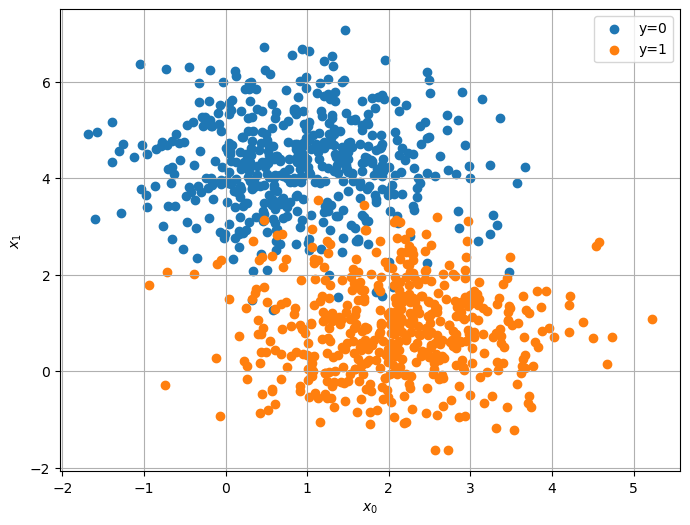

In [5]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y == 0, 0], X[y == 0, 1], label='y=0')
plt.scatter(X[y == 1, 0], X[y == 1, 1], label='y=1')
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.legend()
plt.grid()

In [6]:
knn_class = KNeighborsClassifier(n_neighbors=1, weights = 'uniform', metric = 'minkowski', p = 2)
knn_class.fit(X, y)

KNeighborsClassifier(n_neighbors=1)

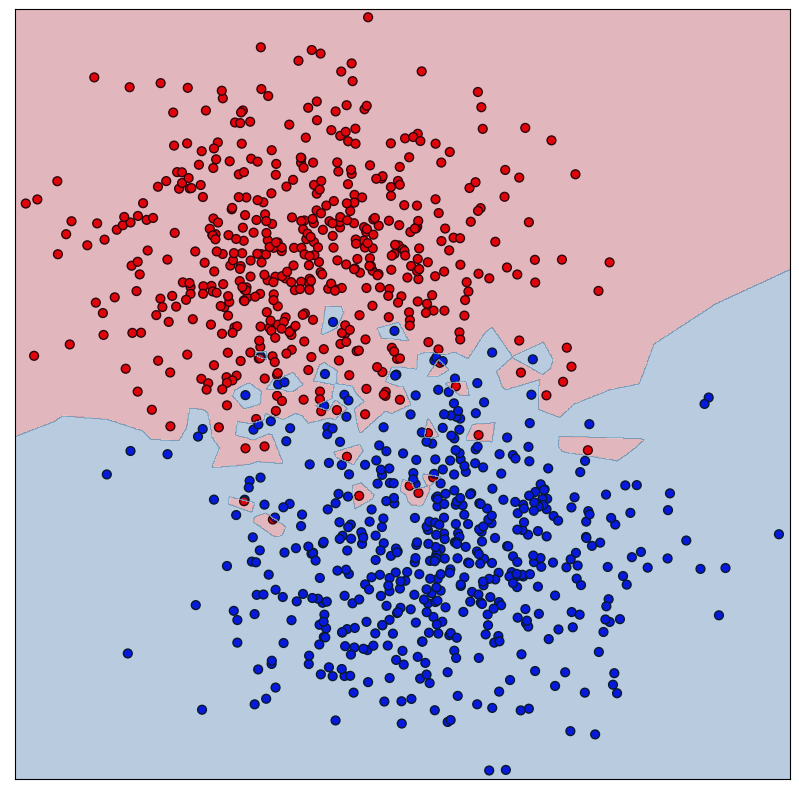

In [7]:
plot_separating_surface(X, y, knn_class)


In [8]:
from sklearn.datasets import fetch_20newsgroups
data = fetch_20newsgroups()


In [9]:
data['target_names']

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [10]:
print(data['data'][18])

From: ritley@uimrl7.mrl.uiuc.edu ()
Subject: SEEKING THERMOCOUPLE AMPLIFIER CIRCUIT
Reply-To: ritley@uiucmrl.bitnet ()
Organization: Materials Research Lab
Lines: 17



I would like to be able to amplify a voltage signal which is
output from a thermocouple, preferably by a factor of
100 or 1000 ---- so that the resulting voltage can be fed
more easily into a personal-computer-based ADC data
acquisition card.

Might anyone be able to point me to references to such
circuits?  I have seen simple amplifier circuits before, but
I am not sure how well they work in practice.

In this case, I'd like something which will amplify sufficiently
"nicely" to be used for thermocouples (say, a few degrees
accuracy or better).

Any pointers would be greatly appreciated!



In [11]:
X_train, y_train = fetch_20newsgroups(subset='train', return_X_y=True, random_state=0)
X_test, y_test = fetch_20newsgroups(subset='test', return_X_y=True, random_state=0)

In [12]:
print(X_train[72])

From: lsmith@myria.cs.umn.edu (Lance "Squiddie" Smith)
Subject: Re: quick way to tell if your local beat writer is dumb.
Nntp-Posting-Host: myria.cs.umn.edu
Organization: The Little Projective Squids of the Poor
Distribution: na
Lines: 28

In article <Apr.5.16.22.48.1993.11331@pilot.njin.net> gajarsky@pilot.njin.net (Bob Gajarsky - Hobokenite) writes:
>
>jayson stark (i think that's him) fits perfectly in this category.

Could be. There is a Jayson Stark that writes weekly for some press syndicate 
and also for Baseball America.

>anyone who writes "dean palmer has 2 homers  - at this pace, he'll
> have 324 home runs!" should be shot.
>
>if, at the end of april, he has 11, and anyone writes "at this
> pace, he'll have 100+ homers!" they shouldbe shot too.

Stark has done this sort of thing, but he has never been serious about it.
He usually states that this sort of projection is useless at the top of 
such columns. I think he did it one season and some manager was "projected" 
to be th

In [13]:
y_train[12]

4

# Example: work with CORPUS


In [14]:
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]


In [15]:
from sklearn.feature_extraction.text import CountVectorizer

In [16]:
vectorizer = CountVectorizer(min_df = 2)
vectorizer.fit(corpus)

CountVectorizer(min_df=2)

In [17]:
vectorizer.get_feature_names_out()

array(['document', 'first', 'is', 'the', 'this'], dtype=object)

In [18]:
vectorizer.transform(corpus).toarray()

array([[1, 1, 1, 1, 1],
       [2, 0, 1, 1, 1],
       [0, 0, 1, 1, 1],
       [1, 1, 1, 1, 1]])

# Example: work with X_train

In [19]:
vectorizer = CountVectorizer(stop_words='english', min_df = 10, max_df = 0.8)
vectorizer.fit(X_train)
vectorizer.get_feature_names_out()

array(['00', '000', '0002', ..., 'zx', 'zyeh', 'zz'], dtype=object)

In [20]:
X_train_vect = vectorizer.transform(X_train).toarray()
X_test_vect = vectorizer.transform(X_test).toarray()

knn_class = KNeighborsClassifier(n_neighbors=5, weights='uniform', metric='minkowski')
knn_class.fit(X_train_vect, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = knn_class.predict(X_test_vect)

In [ ]:
from sklearn.metrics import accuracy

# TF-IDF
t - word, 
d - document, 
D - text, 